In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("summer.csv")

In [ ]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
type(df)

pandas.core.frame.DataFrame

1. In how many cities Summer Olympics is held so far?


In [43]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

2. Which sport is having most number of Gold Medals so far? (Top 5)

,Sport,Num_Gold_Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


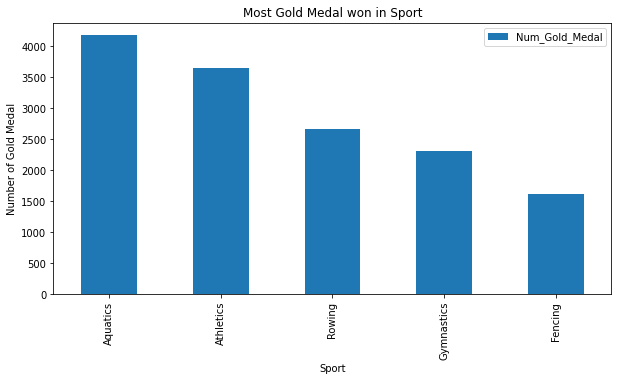

In [44]:
gold = df[df["Medal"]=="Gold"]                                              #Creating new dataframe for gold medal only
data=[]

for sport in gold['Sport'].unique():                                       #Finding number of gold medal won in each sports 
  data.append([sport , len(df[df['Sport']  == sport])])
gold = pd.DataFrame(data, columns=['Sport','Num_Gold_Medal'])                   #Creating new dataframe of sport name and number of gold medal won
gold = gold.sort_values(by = 'Num_Gold_Medal', ascending = False).head()
gold.plot(x = 'Sport', y = 'Num_Gold_Medal', kind = 'bar' ,ylabel = 'Number of Gold Medal', figsize = (10,5), title = 'Most Gold Medal won in Sport')        #Sorting the dataframe and selecting only Top 5 Sports name
gold

3. Which sport is having most number of medals so far? (Top 5)

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


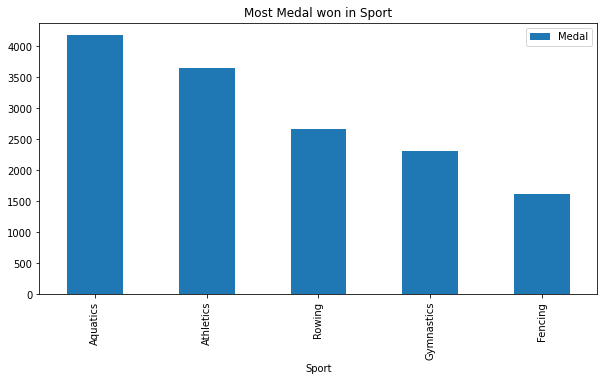

In [45]:
data=[]
for  Medal in df['Sport'].unique():
  data.append([Medal , len(df[df['Sport']  == Medal])])
data = pd.DataFrame(data,columns=['Sport','Medal'])
data = data.sort_values (by='Medal',ascending=False).head()
data.plot(x='Sport',y='Medal',kind='bar',figsize = (10,5), title = 'Most Medal won in Sport')
data

4. Which player has won most number of medals? (Top 5)

,Athlete,Medal
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


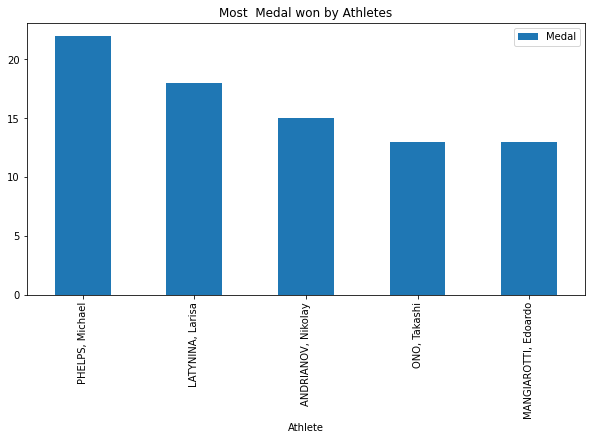

In [46]:
data = []
for Medal in df['Athlete'].unique():
  data.append([Medal,len(df[df['Athlete']==Medal])])
data = pd.DataFrame(data,columns =['Athlete','Medal'])
data = data.sort_values(by='Medal',ascending= False).head()
data.plot(x='Athlete',y='Medal',kind='bar',figsize = (10,5), title = 'Most  Medal won by Athletes')
data

5. Which player has won most number Gold Medals of medals? (Top 5)

,Athlete,Num_Gold_Medal
6851,"PHELPS, Michael",22
2714,"LATYNINA, Larisa",18
3735,"ANDRIANOV, Nikolay",15
2715,"ONO, Takashi",13
1963,"MANGIAROTTI, Edoardo",13


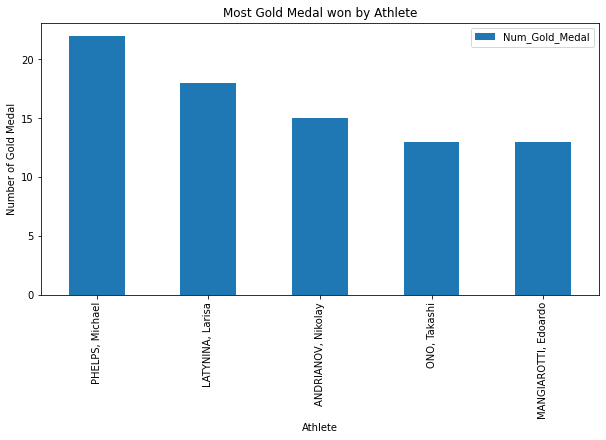

In [48]:
gold= df[df["Medal"]=="Gold"]                                              #Creating new dataframe for gold medal only
data=[]

for sport in gold['Athlete'].unique():                                       #Finding number of gold medal won in each Athlete
  data.append([sport , len(df[df['Athlete']  == sport])])
gold = pd.DataFrame(data, columns=['Athlete','Num_Gold_Medal'])                   #Creating new dataframe of Athlete name and number of gold medal won
gold = gold.sort_values(by = 'Num_Gold_Medal', ascending = False).head()
gold.plot(x = 'Athlete', y = 'Num_Gold_Medal', kind = 'bar' ,ylabel = 'Number of Gold Medal', figsize = (10,5), title = 'Most Gold Medal won by Athlete') 
gold

6. In which year India won first Gold Medal in Summer Olympics?

In [49]:
print(df.loc[(df['Country'] == 'IND')&(df['Medal'] == 'Gold'), 'Year'].values[0])


1928


7. Which event is most popular in terms on number of players? (Top 5)

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

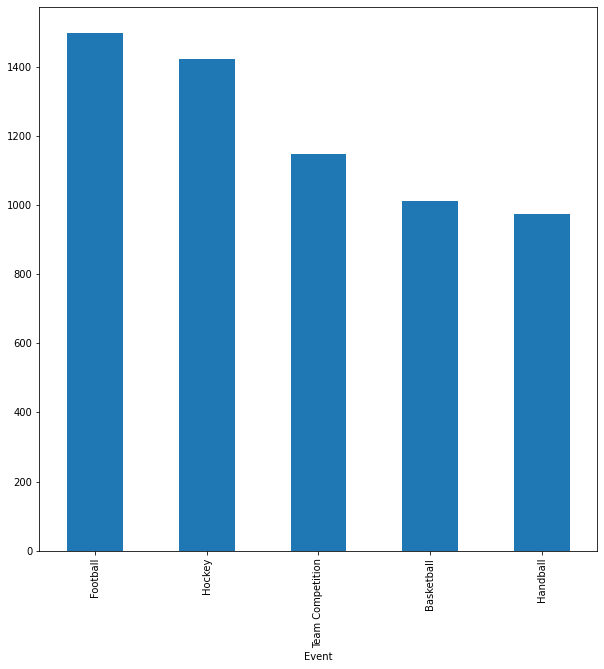

In [50]:
plt.subplots(figsize =(10,10))
data = df.groupby('Event')['Athlete'].count().sort_values(ascending=False).head()
data.plot(x='Event',y ='Athlete',kind='bar')
data


8. Which sport is having most female Gold Medalists? (Top 5)

,Sport,Female gold medals
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


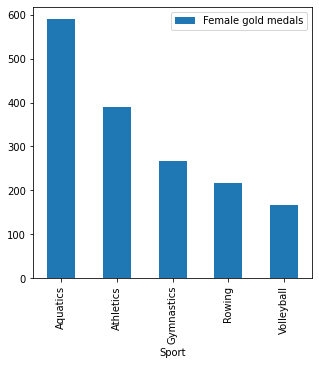

In [51]:
data = []
for p in df.loc[(df['Gender'] == 'Women') & (df['Medal'] == 'Gold'), 'Sport'].value_counts().items():
	data.append(p)
data=pd.DataFrame(data, columns = ['Sport', 'Female gold medals']).sort_values(by = 'Female gold medals', ascending = False).head()
data.plot(x = 'Sport', y = 'Female gold medals', kind = 'bar', figsize = (5, 5))
data